#  Titanic: Machine learning from disaster

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")
Y = data.Survived
cols_to_use = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']
X = data[cols_to_use]
ver_data = pd.read_csv('gender_submission.csv')
survived = ver_data.Survived



In [33]:
data.head(30)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [34]:
data.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [35]:
X = pd.get_dummies(X)

In [37]:
X.isnull().sum()

Pclass          0
Age           177
SibSp           0
Parch           0
Fare            0
Sex_female      0
Sex_male        0
dtype: int64

In [38]:
X.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female', 'Sex_male'], dtype='object')

In [48]:
from sklearn.preprocessing import Imputer
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB

my_imputer = Imputer()
X_imp = my_imputer.fit_transform(X)

x_train, x_test, y_train, y_test = train_test_split(X_imp, Y, random_state=0)


model = LinearSVC()
model.fit(X_imp,Y)



LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [45]:
X_test = test_data[cols_to_use]
X_test.isnull().sum()
X_test = pd.get_dummies(X_test)
X_test_imp = my_imputer.fit_transform(X_test)

In [54]:
pred = model.predict(X_test_imp)

In [55]:
from sklearn.metrics import roc_auc_score, auc, roc_curve


rauc = roc_auc_score(survived, pred)
print(rauc)

0.8796992481203009


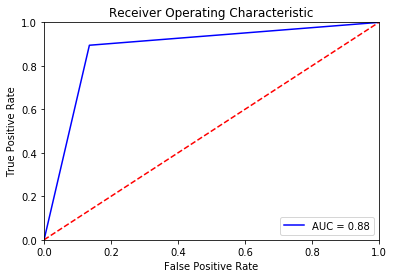

In [61]:
probs = model.predict(X_test_imp)
preds = probs
fpr, tpr, threshold = roc_curve(survived, preds)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [60]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(survived, pred)
print(cm)

[[230  36]
 [ 16 136]]


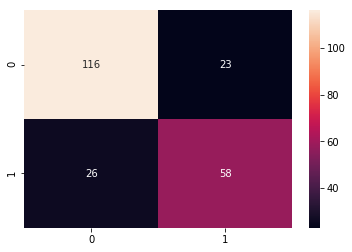

In [27]:
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

In [21]:
test_data.Sex.value_counts()

male      266
female    152
Name: Sex, dtype: int64

In [53]:
X_test.isnull().sum()

Pclass         0
Age           86
SibSp          0
Parch          0
Fare           1
Sex_female     0
Sex_male       0
dtype: int64